In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt
import scipy.stats as ss
import warnings
warnings.filterwarnings("ignore", 'This pattern has match groups')
pd.options.mode.chained_assignment = None

In [2]:
def to_timestamp (d) :
    return d.timestamp()

In [3]:
dog_rates_tweets = pd.read_csv('dog_rates_tweets.csv')

In [4]:
data = dog_rates_tweets[dog_rates_tweets['text'].str.contains(r'(\d+(\.\d+)?)/10') == True]
data['rating'] = (data['text'].str.extract(r'(\d+(\.\d+)?)/10')[0]).astype(float)
data = data.drop(data[data.rating > 25].index)
data.created_at = pd.to_datetime(data.created_at)
data['timestamp'] = data['created_at'].apply(to_timestamp)

In [5]:
fit = ss.linregress(data['timestamp'], data["rating"].values)

In [6]:
data['prediction'] = data['timestamp']*fit.slope + fit.intercept

In [7]:
data

,id,created_at,text,rating,timestamp,prediction
2,994363623421153280,2018-05-09 23:48:56,This is Louie. He has misplaced his Cheerio. W...,14.0,1.525910e+09,12.624973
7,993889039714578432,2018-05-08 16:23:07,This is Manny. He hasn’t seen your croissant. ...,13.0,1.525797e+09,12.622373
8,993629544463642624,2018-05-07 23:11:58,This is Libby. She leap. 14/10\n(IG: libbythef...,14.0,1.525735e+09,12.620951
24,992198572664860672,2018-05-04 00:25:48,This is Rosie. She thought Coachella was this ...,13.0,1.525394e+09,12.613109
30,991744041351090177,2018-05-02 18:19:39,This is Riley. He’ll be your chauffeur this ev...,13.0,1.525285e+09,12.610619
...,...,...,...,...,...,...
11631,1096203765189726208,2019-02-15 00:25:18,"honorary 15/10 for Oppy, the very good space r...",15.0,1.550190e+09,13.183014
11638,1095730341828915200,2019-02-13 17:04:05,This is George. He doesn’t chew socks. He just...,14.0,1.550077e+09,13.180420
11665,1093636946046242817,2019-02-07 22:25:41,@Panthers @Proud_KCS 13/10 easy,13.0,1.549578e+09,13.168949
11666,1093636812818472960,2019-02-07 22:25:09,RT @GeekandSundry: .@Dog_Rates Announces a New...,13.0,1.549578e+09,13.168949


In [8]:
fit.slope, fit.intercept

(2.2983031752244575e-08, -22.445058882763483)

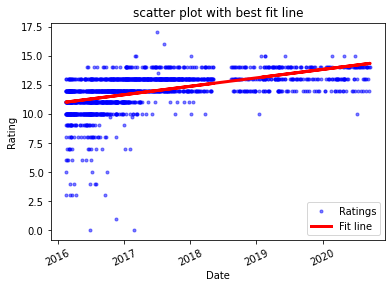

In [21]:
plt.xticks(rotation=25)
plt.title('scatter plot with best fit line')
plt.plot(data["created_at"].dt.date, data["rating"].values, 'b.', alpha=0.5, label = 'Ratings')
plt.plot(data["created_at"].dt.date, data['timestamp']*fit.slope + fit.intercept, 'r-', linewidth=3, label = 'Fit line')
plt.xlabel('Date')
plt.ylabel('Rating')
plt.legend(loc=4)
plt.savefig('plot1.png')
plt.show()

In [10]:
fit.pvalue

3.793798773104138e-121

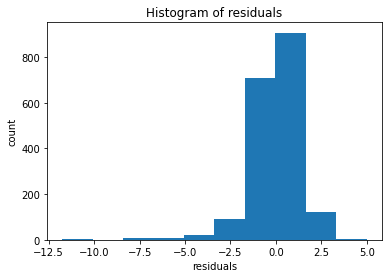

In [23]:
residuals = data["rating"].values - data['prediction']
plt.title('Histogram of residuals')
plt.hist(residuals);
plt.xlabel('residuals')
plt.ylabel('count')
plt.savefig('plot2.png')